In [1]:
from GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider, MetaPatchProvider
from GLC23Datasets import PatchesDataset, PatchesDatasetMultiLabel

In [6]:
import torch
from pathlib import Path
import os
import rasterio
import pandas as pd
import numpy as np

In [4]:
data_path = 'data/full_data/'
presence_only_path = data_path+'Presence_only_occurrences/Presences_only_train.csv'
presence_absence_path = data_path+'Presence_Absence_surveys/Presences_Absences_train.csv'

In [7]:
df = pd.read_csv(presence_only_path, sep=';')
df

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
0,2774863,1.978418e+09,Jim Kingdon,iNaturalist RG,2018-09-29,272,2018,-10.53904,51.77186,2924908.0,3383275.0,4.0,8075,3018869,1000
1,1043549,2.397517e+09,Julie Hall,iNaturalist RG,2019-08-22,234,2019,-10.53875,51.77226,2924939.0,3383313.0,5.0,8075,3018870,1001
2,3104839,3.953467e+09,NaN,Pl@ntNet automatic,2019-07-10,191,2019,-10.47597,52.11013,2939549.0,3418442.0,5.0,6477,3018871,1002
3,1800638,2.294436e+09,gsauce,iNaturalist RG,2019-07-02,183,2019,-10.47555,52.15074,2940838.0,3422801.0,6.0,5783,3018872,1003
4,4873519,2.265857e+09,guillaumevigneault,iNaturalist RG,2019-06-07,158,2019,-10.47497,52.10978,2939604.0,3418385.0,30.0,9011,3018873,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908314,2889852,3.892391e+09,Alenka Mihoric,iNaturalist RG,2018-05-09,129,2018,34.54567,35.64241,6523828.0,1753690.0,21.0,148,7000525,3980319
4908315,1261849,3.355773e+09,Alenka Mihoric,iNaturalist RG,2018-05-09,129,2018,34.54568,35.64243,6523828.0,1753692.0,38.0,625,7000526,3980320
4908316,844504,2.841228e+09,NaN,Observation.org,2019-01-24,24,2019,34.55360,35.64514,6524428.0,1754209.0,10.0,1088,7000527,3980321
4908317,346527,2.842044e+09,NaN,Observation.org,2019-01-24,24,2019,34.55388,35.64499,6524457.0,1754201.0,10.0,982,7000528,3980322


<AxesSubplot: >

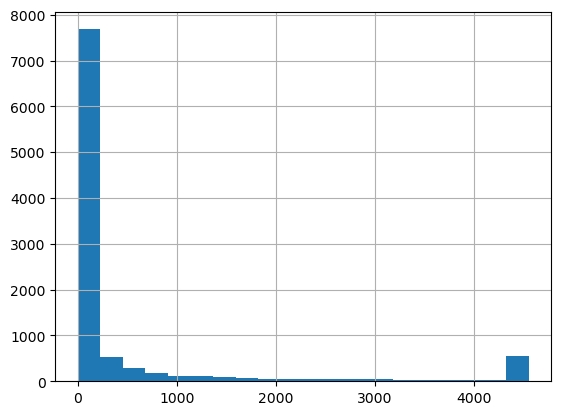

In [31]:
species_counts = df.groupby('speciesId').glcID.count().sort_values()
species_counts.hist(bins=20)

In [35]:
thresh = 500
frac = 0.5
df_no_sample = df[df['speciesId'].isin(species_counts[species_counts <= thresh].index)]
df_sample = df[df['speciesId'].isin(species_counts[species_counts > thresh].index)].groupby(
    'speciesId', group_keys=False).apply(lambda x: x.sample(frac=frac))
df_sampled = pd.concat([df_no_sample, df_sample])
df_sampled.shape

(2821747, 15)

<AxesSubplot: >

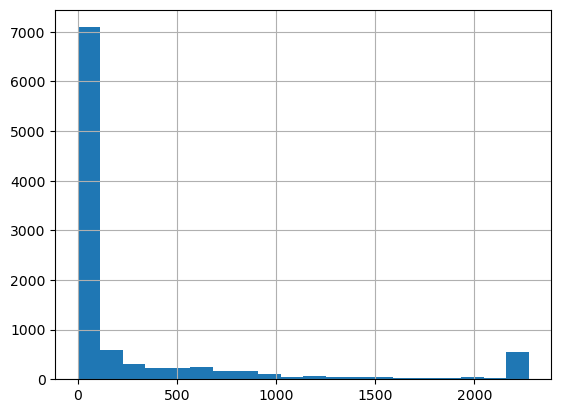

In [36]:
species_counts = df_sampled.groupby('speciesId').glcID.count().sort_values()
species_counts.hist(bins=20)

In [37]:
df_sampled.to_csv(data_path+'Presence_only_occurrences/Presences_only_train_sampled.csv', sep=';')

In [25]:
keep_100 = 
#keep_100
df_keep_100 = 
df_keep_100.shape

(4804620, 15)

In [30]:
df_sampled = 
df_sampled.shape

(2402328, 15)

In [29]:
df_sampled.groupby('speciesId').glcID.count().sort_values()

speciesId
1        100
5        100
10       100
11       100
12       100
        ... 
10025    100
10028    100
10034    100
10035    100
10039    100
Name: glcID, Length: 3072, dtype: int64

In [ ]:

p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') 
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/')

In [4]:
presence_only = PatchesDatasetMultiLabel(
    occurrences=presence_only_path,
    providers=(p_bioclim, p_hfp_s)
)

In [8]:
len(presence_only.unique_sorted_targets)

10038

In [6]:
presence_absence = PatchesDatasetMultiLabel(
        occurrences=presence_absence_path, 
        providers=(p_bioclim, p_hfp_s),
        ref_targets=presence_only.unique_sorted_targets
)

In [32]:
presence_absence.unique_sorted_targets[9040:9050]

array([9041, 9042, 9043, 9044, 9045, 9046, 9048, 9049, 9050, 9051])

In [16]:
df = pd.read_csv(presence_absence_path, sep=';')

In [17]:
df.iloc[0]

glcID                                 5140269
gbifID                           3473384501.0
observer                                (IGN)
datasetName          Inventaire forestier IGN
date                               2018-01-31
dayOfYear                                  31
year                                     2018
lon                                   7.30079
lat                                  48.29273
x_EPSG3035                          4120673.0
y_EPSG3035                          2801353.0
geoUncertaintyInM                         1.0
speciesId                                6574
patchID                               3018575
timeSerieID                           3980325
Name: 0, dtype: object

In [18]:
np.where(presence_absence[0][1] == 1)

(array([1282, 5313, 6573, 6945, 8078, 8986, 9010, 9328]),)

In [20]:
presence_absence.unique_sorted_targets[np.where(presence_absence[0][1] == 1)]

array([1283, 5314, 6574, 6946, 8079, 8987, 9011, 9330])

In [ ]:
presence

In [16]:
occurrences = Path(presence_only_path)
providers = (p_hfp_s, p_bioclim) 
transform=None
target_transform=None
id_name="glcID"
label_name="speciesId"
item_columns=['lat', 'lon', 'patchID']
device="cpu"
provider = MetaPatchProvider(providers, transform)

In [17]:
df = pd.read_csv(occurrences, sep=";", header='infer', low_memory=False)
observation_ids = df[id_name].values
items = df[item_columns]
targets = df[label_name].values #speciesId

unique_items = items.drop_duplicates()
unique_sorted_targets = np.unique(np.sort(targets))

In [19]:
print(targets.shape, unique_sorted_targets.shape)
print(items.shape, unique_items.shape)

(100,) (96,)
(100, 3) (100, 3)


In [29]:
df.iloc[0]

glcID                                       2522017
gbifID                                 1882956579.0
observer                        Bjørn Petter Løfall
datasetName                 NOR Species Observation
date                                     2018-06-17
dayOfYear                                       168
year                                           2018
year_ecodatacube_quarter                        2.0
lon                                        10.95154
lat                                         59.2511
x_EPSG3035                                4375406.0
y_EPSG3035                                4017067.0
geoUncertaintyInM                              10.0
speciesId                                      9343
patchID                                     5982155
timeSerieID                                 2959445
Name: 0, dtype: object

In [30]:
#print(f"PatchesDatasetMultiLabel __getitem__ index={index}")
index = 0
item = items.iloc[index].to_dict()
item

{'lat': 59.2511, 'lon': 10.95154, 'patchID': 5982155.0}

In [32]:
patchid_rows_i = items[items['patchID']==item['patchID']].index
patchid_rows_i

Int64Index([0], dtype='int64')

In [34]:
patch = provider[item]
patch.shape

(4, 128, 128)

In [35]:
item_targets = np.zeros(len(unique_sorted_targets))
for idx in patchid_rows_i:
    target = targets[idx]
    if target_transform:
        target = target_transform(target)
    print(target)
    item_targets[np.where(unique_sorted_targets==target)] = 1
item_targets

9343


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [37]:
unique_sorted_targets[item_targets == 1]

array([9343])

In [21]:

        
        item_targets = np.zeros(len(self.unique_sorted_targets))
        for idx in patchid_rows_i:
            target = self.targets[idx]
            if self.target_transform:
                target = self.target_transform(target)
            item_targets[np.where(self.unique_sorted_targets==target)] = 1

        print(index, len(item_targets), item_targets.sum(), item_targets[np.where(item_targets!=0)])
        item_targets = torch.from_numpy(item_targets).to(self.device)

        return torch.from_numpy(patch).float().to(self.device), item_targets

Int64Index([0], dtype='int64')

In [22]:
unique_sorted_targets

array([  24,  216,  232,  254,  285,  435,  518,  644,  784,  801,  830,
       1108, 1131, 1503, 1576, 1580, 1706, 1729, 1894, 1954, 2165, 2730,
       2752, 2828, 2963, 2989, 3271, 3349, 3384, 3659, 3674, 3704, 3852,
       3892, 3911, 3943, 4013, 4051, 4102, 4143, 4318, 4634, 4835, 4866,
       5000, 5072, 5154, 5233, 5448, 5767, 5773, 5776, 5868, 6026, 6249,
       6461, 6523, 6705, 6826, 7021, 7193, 7246, 7287, 7449, 7583, 7722,
       7740, 7746, 7747, 7826, 7858, 7904, 8058, 8106, 8126, 8144, 8308,
       8367, 8395, 8456, 8487, 8504, 8820, 8987, 9120, 9343, 9509, 9540,
       9558, 9607, 9669, 9675, 9739, 9753, 9785, 9826])

In [23]:
patch = provider[item]
patch.shape

(4, 128, 128)

In [25]:
item_targets = np.zeros(len(unique_sorted_targets))
item_targets.sum()

0.0

In [27]:
for idx in patchid_rows_i:
    target = targets[idx]
    print(idx, target)
    item_targets[np.where(unique_sorted_targets==target)] = 1

print(item_targets)

0 9343
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:

        for idx in patchid_rows_i:
            target = self.targets[idx]
            if self.target_transform:
                target = self.target_transform(target)
            targets[np.where(self.targets_sorted==target)] = 1

        print(index, len(targets), targets.sum(), targets[np.where(targets!=0)])
        targets = torch.from_numpy(targets).to(self.device)

        return torch.from_numpy(patch).float().to(self.device), targets

In [37]:
patch = provider[item]
patch.shape

MetaPatchProvider __getitem__ item={'lat': 59.2511, 'lon': 10.95154, 'patchID': 5982155.0}
RasterPatchProvider __getitem__ item={'lat': 59.2511, 'lon': 10.95154, 'patchID': 5982155.0}
RasterPatchProvider __getitem__ item={'lat': 59.2511, 'lon': 10.95154, 'patchID': 5982155.0}
RasterPatchProvider __getitem__ item={'lat': 59.2511, 'lon': 10.95154, 'patchID': 5982155.0}
RasterPatchProvider __getitem__ item={'lat': 59.2511, 'lon': 10.95154, 'patchID': 5982155.0}


(4, 128, 128)

In [48]:
targets_vec = np.zeros(len(targets))
targets_vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [51]:
targets_vec[np.where(targets_vec!=0)]

array([1.])

In [49]:
idx=0
target = targets[idx]
target

9343

In [50]:
targets_vec[np.where(targets_sorted==target)] = 1
targets_vec

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:

        
        for idx in patchid_rows_i:
            target = self.targets[idx]
            if self.target_transform:
                target = self.target_transform(target)
            
        targets = torch.from_numpy(targets).to(self.device)

In [ ]:

class PatchesDataset(Dataset):
    def __init__(
        self,
        occurrences,
        providers,
        transform=None,
        target_transform=None,
        id_name="glcID",
        label_name="speciesId",
        item_columns=['lat', 'lon', 'patchID'],
        device="cpu"
    ):
        #print("PatchesDataset __init__")
        self.occurences = Path(occurrences)
        self.base_providers = providers
        self.transform = transform
        self.target_transform = target_transform
        self.provider = MetaPatchProvider(self.base_providers, self.transform)
        self.device = device

        df = pd.read_csv(self.occurences, sep=";", header='infer', low_memory=False)

        self.observation_ids = df[id_name].values
        self.items = df[item_columns]
        self.targets = df[label_name].values

    def __len__(self):
        #print("PatchesDataset __init__")
        return len(self.observation_ids)

    def __getitem__(self, index):
        #print(f"PatchesDataset __getitem__ index={index}")

        item = self.items.iloc[index].to_dict()
        patch = self.provider[item]
        target = self.targets[index]

        if self.target_transform:
            target = self.target_transform(target)

        return torch.from_numpy(patch).float().to(self.device), target
    
    def plot_patch(self, index):
        item = self.items.iloc[index].to_dict()
        self.provider.plot_patch(item)


class PatchesDatasetMultiLabel(PatchesDataset):
    def __init__(self,
        occurrences,
        providers,
        transform=None,
        target_transform=None,
        id_name="glcID",
        label_name="speciesId",
        item_columns=['lat', 'lon', 'patchID'],
        device="cpu"
    ):
        #print("PatchesDatasetMultiLabel __init__")
        super().__init__(occurrences, providers, transform, target_transform, id_name, label_name, item_columns, device)
        
    def __getitem__(self, index):
        #print(f"PatchesDatasetMultiLabel __getitem__ index={index}")
        item = self.items.iloc[index].to_dict()
        patchid_rows_i = self.items[self.items['patchID']==item['patchID']].index
        self.targets_sorted = np.sort(self.targets)

        patch = self.provider[item]
        targets = np.zeros(len(self.targets))
        for idx in patchid_rows_i:
            target = self.targets[idx]
            if self.target_transform:
                target = self.target_transform(target)
            targets[np.where(self.targets_sorted==target)] = 1
        targets = torch.from_numpy(targets).to(self.device)

        return torch.from_numpy(patch).float().to(self.device), targets

In [3]:
dev = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(dev)

cuda:0


In [35]:
data_path = 'data/full_data/'
presence_only_path = data_path+'Presence_only_occurrences/Presences_only_train.csv'
p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster
#presence_only = PatchesDatasetMultiLabel(occurrences=presence_only_path, providers=(p_hfp_s), device=dev)


---- RasterPatchProvider __init__


In [36]:
#PatchesDatasetMultiLabel __init__
occurrences = presence_only_path
occurrences = Path(occurrences)
providers = (p_hfp_s)
device = dev
transform=None
target_transform=None,
id_name="glcID",
label_name="speciesId"
item_columns=['lat', 'lon', 'patchID']
#PatchesDataset __init__
#self.provider = MetaPatchProvider(self.base_providers, self.transform)
df = pd.read_csv(occurrences, sep=";", header='infer', low_memory=False)
df

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
0,2774863,1.978418e+09,Jim Kingdon,iNaturalist RG,2018-09-29,272,2018,-10.53904,51.77186,2924908.0,3383275.0,4.0,8075,3018869,1000
1,1043549,2.397517e+09,Julie Hall,iNaturalist RG,2019-08-22,234,2019,-10.53875,51.77226,2924939.0,3383313.0,5.0,8075,3018870,1001
2,3104839,3.953467e+09,NaN,Pl@ntNet automatic,2019-07-10,191,2019,-10.47597,52.11013,2939549.0,3418442.0,5.0,6477,3018871,1002
3,1800638,2.294436e+09,gsauce,iNaturalist RG,2019-07-02,183,2019,-10.47555,52.15074,2940838.0,3422801.0,6.0,5783,3018872,1003
4,4873519,2.265857e+09,guillaumevigneault,iNaturalist RG,2019-06-07,158,2019,-10.47497,52.10978,2939604.0,3418385.0,30.0,9011,3018873,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908314,2889852,3.892391e+09,Alenka Mihoric,iNaturalist RG,2018-05-09,129,2018,34.54567,35.64241,6523828.0,1753690.0,21.0,148,7000525,3980319
4908315,1261849,3.355773e+09,Alenka Mihoric,iNaturalist RG,2018-05-09,129,2018,34.54568,35.64243,6523828.0,1753692.0,38.0,625,7000526,3980320
4908316,844504,2.841228e+09,NaN,Observation.org,2019-01-24,24,2019,34.55360,35.64514,6524428.0,1754209.0,10.0,1088,7000527,3980321
4908317,346527,2.842044e+09,NaN,Observation.org,2019-01-24,24,2019,34.55388,35.64499,6524457.0,1754201.0,10.0,982,7000528,3980322


In [37]:
observation_ids = df.loc[:,id_name].values
items = df[item_columns]
targets = df[label_name].values

In [42]:
#self.nb_layers = sum([len(provider) for provider in self.providers])
provider = providers[0]
provider

---- RasterPatchProvider __getitem__ 0
> /home/nina/Documents/GeoLifeCLEF/GLC23PatchesProviders.py(158)__getitem__()
    156         self.epsg = self.crs.to_epsg()
    157         if self.epsg != 4326:
--> 158             # create a pyproj transformer object to convert lat, lon to EPSG:32738
    159             self.transformer = pyproj.Transformer.from_crs("epsg:4326", self.epsg, always_xy=True)
    160 



In [39]:
providers[0]

---- RasterPatchProvider __getitem__ 0
> /home/nina/Documents/GeoLifeCLEF/GLC23PatchesProviders.py(158)__getitem__()
    156         self.epsg = self.crs.to_epsg()
    157         if self.epsg != 4326:
--> 158             # create a pyproj transformer object to convert lat, lon to EPSG:32738
    159             self.transformer = pyproj.Transformer.from_crs("epsg:4326", self.epsg, always_xy=True)
    160 

--KeyboardInterrupt--

KeyboardInterrupt: Interrupted by user


TypeError: 'int' object is not subscriptable

In [ ]:
#MetaPatchProvider __init__
#nb_layers = sum([len(provider) for provider in providers])
#---- RasterPatchProvider __getitem__ 0





In [ ]:
def __getitem__(self, item):
        print(f"RasterPatchProvider __getitem__ item={item}")
        import pdb; pdb.set_trace()

        """
        :param item: dictionary that needs to contains at least the keys latitude and longitude ({'lat': lat, 'lon':lon})
        :return: return the environmental tensor or vector (size>1 or size=1)
        """
        # convert the lat, lon coordinates to EPSG:32738
        if self.transformer:
            lon, lat = self.transformer.transform(item['lon'], item['lat'])
        else:
            lon, lat = (item['lon'], item['lat'])

        # add noise as data augmentation
        if self.spatial_noise > 0:
            lon = lon + ((random()*2*self.spatial_noise)-self.spatial_noise)
            lat = lat + ((random()*2*self.spatial_noise)-self.spatial_noise)

        # calculate the x, y coordinate of the point of interest
        x = int(self.n_rows - (lat - self.y_min) / self.y_resolution)
        y = int((lon - self.x_min) / self.x_resolution)

        # read the data of the patch from all layers
        if self.patch_size == 1:
            patch_data = [self.data[i, x, y] for i in range(self.nb_layers)]
        else:
            patch_data = [self.data[i, x - (self.patch_size // 2): x + (self.patch_size // 2), y - (self.patch_size // 2): y + (self.patch_size // 2)] for i in range(self.nb_layers)]
        
        tensor = np.concatenate([patch[np.newaxis] for patch in patch_data])
        if self.fill_zero_if_error and tensor.shape != (self.nb_layers, self.patch_size, self.patch_size):
            tensor = np.zeros((self.nb_layers, self.patch_size, self.patch_size))
        return tensor
    
    def __str__(self):
        print("RasterPatchProvider __str__")

        result = '-' * 50 + '\n'
        result += 'n_layers: ' + str(self.nb_layers) + '\n'
        result += 'x_min: ' + str(self.x_min) + '\n'
        result += 'y_min: ' + str(self.y_min) + '\n'
        result += 'x_resolution: ' + str(self.x_resolution) + '\n'
        result += 'y_resolution: ' + str(self.y_resolution) + '\n'
        result += 'n_rows: ' + str(self.n_rows) + '\n'
        result += 'n_cols: ' + str(self.n_cols) + '\n'
        result += '-' * 50
        return result

In [7]:
        self.bands_names = list(itertools.chain.from_iterable([provider.bands_names for provider in self.providers]))
        self.transform = transform

--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------

In [9]:
len(providers)

1

In [13]:
raster_path = data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif'
#RasterPatchProvider
# init ->  PatchProvider      
patch_size = 128
normalize = True
nb_layers = 0
# init -> RasterPatchProvider
spatial_noise=0
fill_zero_if_error=False
transformer = None
name = os.path.basename(os.path.splitext(raster_path)[0])
normalize=True

In [16]:
with rasterio.open(raster_path) as src:
    meta = src.meta
    meta.update(count=src.count) # update the count of the meta to match the number of layers
    data = src.read()

In [ ]:
    def __init__(self, raster_path, size=128, spatial_noise=0, normalize=True, fill_zero_if_error=False, nan_value=0):


        # open the tif file with rasterio
        with rasterio.open(raster_path) as src:
            # read the metadata of the file
            meta = src.meta
            meta.update(count=src.count) # update the count of the meta to match the number of layers

            # read the data from the raster
            self.data = src.read()

            # get the NoData value from the raster
            self.nodata_value = src.nodatavals

            # iterate through all the layers
            for i in range(src.count):
                # replace the NoData values with np.nan
                self.data = self.data.astype(np.float)
                self.data[i] = np.where(self.data[i] == self.nodata_value[i], np.nan, self.data[i])
                if self.normalize:
                    self.data[i] = (self.data[i] - np.nanmean(self.data[i]))/np.nanstd(self.data[i])
                self.data[i] = np.where(np.isnan(self.data[i]), nan_value, self.data[i])
            
            self.nb_layers = src.count

            self.x_min = src.bounds.left
            self.y_min = src.bounds.bottom
            self.x_resolution = src.res[0]
            self.y_resolution = src.res[1]
            self.n_rows = src.height
            self.n_cols = src.width
            self.crs = src.crs
        if self.nb_layers > 1:
            self.bands_names = [self.name+'_'+str(i+1) for i in range(self.nb_layers)]
        else:
            self.bands_names = [self.name]
        
        self.epsg = self.crs.to_epsg()
        if self.epsg != 4326:
            # create a pyproj transformer object to convert lat, lon to EPSG:32738
            self.transformer = pyproj.Transformer.from_crs("epsg:4326", self.epsg, always_xy=True)


In [ ]:
#provider = MetaPatchProvider(base_providers, transform)
nb_layers = sum([len(provider) for provider in providers])


In [ ]:
self.providers = providers
        self.
        self.bands_names = list(itertools.chain.from_iterable([provider.bands_names for provider in self.providers]))
        self.transform = transform

In [ ]:
nb_layers = sum([len(provider) for provider in providers])

In [ ]:

        self.provider = MetaPatchProvider(self.base_providers, self.transform)
        self.device = device

        df = pd.read_csv(self.occurences, sep=";", header='infer', low_memory=False)

        self.observation_ids = df[id_name].values
        self.items = df[item_columns]
        self.targets = df[label_name].values

In [ ]:
class PatchesDatasetMultiLabel(PatchesDataset):
    def __init__(self,
        occurrences,
        providers,
        transform=None,
        target_transform=None,
        id_name="glcID",
        label_name="speciesId",
        item_columns=['lat', 'lon', 'patchID'],
        device="cpu"
    ):
        super().__init__(occurrences, providers, transform, target_transform, id_name, label_name, item_columns, device)
        
    def __getitem__(self, index):
        print(f" ---> PatchesDatasetMultiLabel __get__item {index}")
        import pdb; pdb.set_trace()
        item = self.items.iloc[index].to_dict()
        patchid_rows_i = self.items[self.items['patchID']==item['patchID']].index
        self.targets_sorted = np.sort(self.targets)

        print(f"item {item}")
        patch = self.provider[item]

        targets = np.zeros(len(self.targets))
        for idx in patchid_rows_i:
            target = self.targets[idx]
            if self.target_transform:
                target = self.target_transform(target)
            targets[np.where(self.targets_sorted==target)] = 1
        targets = torch.from_numpy(targets).to(self.device)

        return torch.from_numpy(patch).float().to(self.device), targets

In [38]:
from GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider
from GLC23Datasets import PatchesDataset, PatchesDatasetMultiLabel

In [15]:
import torch

In [16]:
device = "cuda:0" if torch.cuda.is_available() else "cpu"

In [17]:
device

'cuda:0'

In [36]:
data_path = 'data/full_data/'
presence_only_path = data_path+'Presence_only_occurrences/Presences_only_train.csv'

# configure providers
# p_hfp_d = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/detailed/') # take all rasters from human footprint detailed (2 rasters here)
# p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/', select=['bio1', 'bio2']) # take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
# p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster (a single raster)
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/') # take all sentinel imagery layers (r,g,b,nir = 4 layers)

In [37]:
# create dataset
multi_dataset = PatchesDatasetMultiLabel(
    occurrences=presence_only_path,
    providers=(p_rgb), device=device) #p_hfp_d, p_bioclim, p_hfp_s, 

Exception: An error has occured when trying to load a patch patchID.Check that the input argument is a dict containing the "patchID" key.

In [22]:
multi_dataset[0][0]

tensor([[[-0.2597, -0.2597, -0.2597,  ...,  3.8510,  3.8510, -0.2597],
         [-0.2597, -0.2597, -0.2597,  ...,  3.8510,  3.8510,  3.8510],
         [-0.2597, -0.2597, -0.2597,  ...,  3.8510,  3.8510,  3.8510],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597]],

        [[ 1.8088,  1.4273,  1.8088,  ...,  2.5719,  2.5719,  2.1904],
         [ 2.1904,  2.1904,  1.8088,  ...,  2.9534,  2.5719,  2.5719],
         [ 2.1904,  2.1904,  2.1904,  ...,  2.9534,  2.9534,  2.9534],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ..., -0.4803, -0.4803, -0.4803],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.4803, -0.4803, -0.4803],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.4803, -0.4803, -0.4803]],

        [[-0.5647, -0.5229, -0.5020,  ..., -0.4915, -0.5020, -0.4915],
         [-0.5229, -0.5229, -0.5124,  ..., -0

In [23]:
train_loader = torch.utils.data.DataLoader(multi_dataset, shuffle=True, batch_size=12)

In [33]:
for i, l in train_loader:
    print(i,l)
    break

tensor([[[[-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          [-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          [-0.2597, -0.2597, -0.2597,  ..., -0.2597, -0.2597, -0.2597],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
          [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597],
          [ 0.0000,  0.0000,  0.0000,  ..., -0.2597, -0.2597, -0.2597]],

         [[-0.4803, -0.4803, -0.4803,  ..., -0.4803, -0.4803, -0.4803],
          [-0.0988, -0.4803, -0.4803,  ..., -0.4803, -0.4803, -0.4803],
          [-0.4803, -0.4803, -0.4803,  ..., -0.4803, -0.4803, -0.4803],
          ...,
          [ 0.0000,  0.0000,  0.0000,  ..., -0.4803, -0.4803, -0.4803],
          [ 0.0000,  0.0000,  0.0000,  ..., -0.4803, -0.4803, -0.4803],
          [ 0.0000,  0.0000,  0.0000,  ..., -0.4803, -0.4803, -0.4803]],

         [[-0.7318, -0.7423, -0.7214,  ..., -0.5855, -0.5960, -0.5960],
          [-0.7109, -0.7109, -

In [34]:
l.shape

torch.Size([12, 100])

In [1]:
import pandas as pd
import numpy as np
import os
import rasterio
import pyproj
import torch

In [2]:
from Datasets import RasterPatchProvider, MultipleRasterPatchProvider

In [16]:
raster_folder = 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/'
p = MultipleRasterPatchProvider(raster_folder)
print(p)

Rasters in folder: 19
['bio9', 'bio8', 'bio7', 'bio6', 'bio5', 'bio4', 'bio3', 'bio2', 'bio19', 'bio18', 'bio17', 'bio16', 'bio15', 'bio14', 'bio13', 'bio12', 'bio11', 'bio10', 'bio1']



In [8]:
occurrences_path = 'data/full_data/Presence_only_occurrences/Presences_only_train.csv'
occurrences = pd.read_csv(occurrences_path, sep=';', header='infer', low_memory=False)
occurrences

,glcID,gbifID,observer,datasetName,date,dayOfYear,year,lon,lat,x_EPSG3035,y_EPSG3035,geoUncertaintyInM,speciesId,patchID,timeSerieID
0,2774863,1.978418e+09,Jim Kingdon,iNaturalist RG,2018-09-29,272,2018,-10.53904,51.77186,2924908.0,3383275.0,4.0,8075,3018869,1000
1,1043549,2.397517e+09,Julie Hall,iNaturalist RG,2019-08-22,234,2019,-10.53875,51.77226,2924939.0,3383313.0,5.0,8075,3018870,1001
2,3104839,3.953467e+09,NaN,Pl@ntNet automatic,2019-07-10,191,2019,-10.47597,52.11013,2939549.0,3418442.0,5.0,6477,3018871,1002
3,1800638,2.294436e+09,gsauce,iNaturalist RG,2019-07-02,183,2019,-10.47555,52.15074,2940838.0,3422801.0,6.0,5783,3018872,1003
4,4873519,2.265857e+09,guillaumevigneault,iNaturalist RG,2019-06-07,158,2019,-10.47497,52.10978,2939604.0,3418385.0,30.0,9011,3018873,1004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4908314,2889852,3.892391e+09,Alenka Mihoric,iNaturalist RG,2018-05-09,129,2018,34.54567,35.64241,6523828.0,1753690.0,21.0,148,7000525,3980319
4908315,1261849,3.355773e+09,Alenka Mihoric,iNaturalist RG,2018-05-09,129,2018,34.54568,35.64243,6523828.0,1753692.0,38.0,625,7000526,3980320
4908316,844504,2.841228e+09,NaN,Observation.org,2019-01-24,24,2019,34.55360,35.64514,6524428.0,1754209.0,10.0,1088,7000527,3980321
4908317,346527,2.842044e+09,NaN,Observation.org,2019-01-24,24,2019,34.55388,35.64499,6524457.0,1754201.0,10.0,982,7000528,3980322


In [9]:
observation_ids = occurrences['glcID'].values
observation_ids

array([2774863, 1043549, 3104839, ...,  844504,  346527,  713628])

In [10]:
items = occurrences[['lat', 'lon', 'patchID']]
items

,lat,lon,patchID
0,51.77186,-10.53904,3018869
1,51.77226,-10.53875,3018870
2,52.11013,-10.47597,3018871
3,52.15074,-10.47555,3018872
4,52.10978,-10.47497,3018873
...,...,...,...
4908314,35.64241,34.54567,7000525
4908315,35.64243,34.54568,7000526
4908316,35.64514,34.55360,7000527
4908317,35.64499,34.55388,7000528


In [11]:
targets = occurrences['speciesId'].values
targets

array([8075, 8075, 6477, ..., 1088,  982, 9395])

In [13]:
index = 0
item = items.iloc[index].to_dict()
item

{'lat': 51.77186, 'lon': -10.53904, 'patchID': 3018869.0}

In [14]:
items[items['patchID']==item['patchID']].index

Int64Index([0], dtype='int64')

In [15]:
np.sort(targets)

array([    1,     1,     1, ..., 10039, 10039, 10039])

In [ ]:
provider[item]

In [18]:
p[0]

TypeError: 'MultipleRasterPatchProvider' object is not subscriptable

In [ ]:
    def __getitem__(self, item):
        return np.concatenate([raster[item] for raster in self.rasters_providers])

In [3]:
#raster_path = 'data/sample_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio1.tif'
raster_path = 'data/full_data/EnvironmentalRasters/HumanFootprint/detailed/Lights1994_WGS84.tif'
d = RasterPatchProvider(raster_path)

In [5]:
d.transformer

In [14]:
item

{'lat': 51.77186, 'lon': -10.53904, 'patchID': 3018869.0}

In [15]:
if d.transformer:
    lon, lat = d.transformer.transform(item['lon'], item['lat'])
else:
    lon, lat = (item['lon'], item['lat'])
print(lon ,lat)


-10.53904 51.77186


In [16]:
# calculate the x, y coordinate of the point of interest
x = int(d.n_rows - (lat - d.y_min) / d.y_resolution)
y = int((lon - d.x_min) / d.x_resolution)
print(x,y)

2063 2196


In [18]:
d.data.shape

(1, 4605, 6860)

In [19]:
patch_size = 1
if patch_size == 1:
    patch_data = [d.data[i, x, y] for i in range(d.nb_layers)]
else:
    patch_data = [self.data[i, x - (self.patch_size // 2): x + (self.patch_size // 2), y - (self.patch_size // 2): y + (self.patch_size // 2)] for i in range(self.nb_layers)]
patch_data

[0.0]

In [ ]:
# read the data of the patch from all layers
        if self.patch_size == 1:
            patch_data = [self.data[i, x, y] for i in range(self.nb_layers)]
        else:
            patch_data = [self.data[i, x - (self.patch_size // 2): x + (self.patch_size // 2), y - (self.patch_size // 2): y + (self.patch_size // 2)] for i in range(self.nb_layers)]

In [ ]:

        
        tensor = np.concatenate([patch[np.newaxis] for patch in patch_data])
        if self.fill_zero_if_error and tensor.shape != (self.nb_layers, self.patch_size, self.patch_size):
            tensor = np.zeros((self.nb_layers, self.patch_size, self.patch_size))
        return tensor

In [5]:

    def __getitem__(self, item):
        """
        :param item: dictionary that needs to contains at least the keys latitude and longitude ({'lat': lat, 'lon':lon})
        :return: return the environmental tensor or vector (size>1 or size=1)
        """
        
        # convert the lat, lon coordinates to EPSG:32738
        if self.transformer:
            lon, lat = self.transformer.transform(item['lon'], item['lat'])
        else:
            lon, lat = (item['lon'], item['lat'])

        # add noise as data augmentation
        if self.spatial_noise > 0:
            lon = lon + ((random()*2*self.spatial_noise)-self.spatial_noise)
            lat = lat + ((random()*2*self.spatial_noise)-self.spatial_noise)

        # calculate the x, y coordinate of the point of interest
        x = int(self.n_rows - (lat - self.y_min) / self.y_resolution)
        y = int((lon - self.x_min) / self.x_resolution)

        # read the data of the patch from all layers
        if self.patch_size == 1:
            patch_data = [self.data[i, x, y] for i in range(self.nb_layers)]
        else:
            patch_data = [self.data[i, x - (self.patch_size // 2): x + (self.patch_size // 2), y - (self.patch_size // 2): y + (self.patch_size // 2)] for i in range(self.nb_layers)]
        
        tensor = np.concatenate([patch[np.newaxis] for patch in patch_data])
        if self.fill_zero_if_error and tensor.shape != (self.nb_layers, self.patch_size, self.patch_size):
            tensor = np.zeros((self.nb_layers, self.patch_size, self.patch_size))
        return tensor

Rasters in folder: 19
['bio9', 'bio8', 'bio7', 'bio6', 'bio5', 'bio4', 'bio3', 'bio2', 'bio19', 'bio18', 'bio17', 'bio16', 'bio15', 'bio14', 'bio13', 'bio12', 'bio11', 'bio10', 'bio1']



In [19]:

files = os.listdir(raster_folder)
files = [raster_folder + f for f in files if f.endswith('.tif')]
files

['data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio9.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio8.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio7.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio6.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio5.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio4.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio3.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio2.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio19.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio18.tif',
 'data/full_data/EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/bio17.tif',
 'data/full_data/EnvironmentalRasters/Cl

In [4]:
raster_providers = [RasterPatchProvider(f, normalize=True) for f in files]

In [5]:
[len(raster) for raster in raster_providers]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [6]:
sum([len(raster) for raster in raster_providers])

19

In [10]:
import itertools

In [14]:
list(itertools.chain.from_iterable([raster.band_names for raster in raster_providers]))

['bio9',
 'bio8',
 'bio7',
 'bio6',
 'bio5',
 'bio4',
 'bio3',
 'bio2',
 'bio19',
 'bio18',
 'bio17',
 'bio16',
 'bio15',
 'bio14',
 'bio13',
 'bio12',
 'bio11',
 'bio10',
 'bio1']

In [36]:
 self.rasters_providers = [RasterPatchProvider(rasters_folder+path, size=size, spatial_noise=spatial_noise, normalize=normalize, fill_zero_if_error=fill_zero_if_error) for path in rasters_paths]
        self.nb_layers = sum([len(raster) for raster in self.rasters_providers])
        self.bands_names = list(itertools.chain.from_iterable([raster.bands_names for raster in self.rasters_providers]))
    

array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -0.42757125, -0.42757125, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , -0.42757125, -0.42757125, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]]])

In [31]:
np.nanstd(data[i])

2.503515679188726

In [32]:
i=0
(data[i] - np.nanmean(data[i]))/np.nanstd(data[i])
#self.data[i] = np.where(np.isnan(self.data[i]), nan_value, self.data[i])

array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan, -0.42757125, -0.42757125, ...,         nan,
                nan,         nan],
       [        nan, -0.42757125, -0.42757125, ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])

In [27]:
data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [22]:
data[0]

array([[127, 127, 127, ..., 127, 127, 127],
       [127,   0,   0, ..., 127, 127, 127],
       [127,   0,   0, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127],
       [127, 127, 127, ..., 127, 127, 127]], dtype=uint8)

In [ ]:
with rasterio.open(raster_path) as src:
    meta = src.meta
            self.meta.update(count=src.count)
            self.data = src.read()
            self.nodata_value = src.nodatavals

            # iterate through all the layers
            for i in range(src.count):
                # replace the NoData values with np.nan
                self.data = self.data.astype(np.float)
                self.data[i] = np.where(self.data[i] == self.nodata_value[i], np.nan, self.data[i])
                if normalize:
                    self.data[i] = (self.data[i] - np.nanmean(self.data[i]))/np.nanstd(self.data[i])
                self.data[i] = np.where(np.isnan(self.data[i]), nan_value, self.data[i])

In [ ]:
with rasterio.open(raster_path) as src:
            self.meta = src.meta
            self.meta.update(count=src.count)
            self.data = src.read()
            self.nodata_value = src.nodatavals

            # iterate through all the layers
            for i in range(src.count):
                # replace the NoData values with np.nan
                self.data = self.data.astype(np.float)
                self.data[i] = np.where(self.data[i] == self.nodata_value[i], np.nan, self.data[i])
                if normalize:
                    self.data[i] = (self.data[i] - np.nanmean(self.data[i]))/np.nanstd(self.data[i])
                self.data[i] = np.where(np.isnan(self.data[i]), nan_value, self.data[i])

        self.nb_layers = src.count
        self.x_min = src.bounds.left
        self.y_min = src.bounds.bottom
        self.x_resolution = src.res[0]
        self.y_resolution = src.res[1]
        self.n_rows = src.height
        self.n_cols = src.width
        self.crs = src.crs
        if self.nb_layers > 1:
            self.bands_names = [self.name+'_'+str(i+1) for i in range(self.nb_layers)]
        else:
            self.bands_names = [self.name]
        
        self.epsg = self.crs.to_epsg()
        if self.epsg != 4326:
            # create a pyproj transformer object to convert lat, lon to EPSG:32738
            self.transformer = pyproj.Transformer.from_crs("epsg:4326", self.epsg, always_xy=True)



In [65]:
from GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider

In [2]:
po = pd.read_csv('data/full_data/Presence_only_occurrences/Presences_only_train.csv', sep=';')
po.shape

(4908319, 15)

In [10]:
observation_ids = po['glcID'].values
observation_ids

array([2774863, 1043549, 3104839, ...,  844504,  346527,  713628])

In [11]:
items = po[['lat', 'lon', 'patchID']]
items

,lat,lon,patchID
0,51.77186,-10.53904,3018869
1,51.77226,-10.53875,3018870
2,52.11013,-10.47597,3018871
3,52.15074,-10.47555,3018872
4,52.10978,-10.47497,3018873
...,...,...,...
4908314,35.64241,34.54567,7000525
4908315,35.64243,34.54568,7000526
4908316,35.64514,34.55360,7000527
4908317,35.64499,34.55388,7000528


In [12]:
targets = po['speciesId'].values
targets

array([8075, 8075, 6477, ..., 1088,  982, 9395])

In [64]:
data_path = 'data/sample_data/'
patch_rasters_folder_paths = [
    data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/',
    data_path+'EnvironmentalRasters/HumanFootprint/detailed/'
]

In [ ]:
def get_rasters_data(rasters_folder):
    files = os.listdir(rasters_folder)
    rasters_paths = [rasters_folder + f for f in files if f.endswith('.tif')]
    data = [get_raster_data(p) for p in rasters_paths]

In [ ]:
def get_raster_data(raster_path, normalize = True, nan_value=0):
    name = os.path.basename(os.path.splitext(raster_path)[0])


In [51]:


with rasterio.open(raster_path) as src:
    meta = src.meta
    meta.update(count=src.count)
    data = src.read()
    nodata_value = src.nodatavals

    # iterate through all the layers
    for i in range(src.count):
        # replace the NoData values with np.nan
            data = data.astype(np.float)
            data[i] = np.where(data[i] == nodata_value[i], np.nan, data[i])
            if normalize:
                data[i] = (data[i] - np.nanmean(data[i]))/np.nanstd(data[i])
            data[i] = np.where(np.isnan(data[i]), nan_value, data[i])

    nb_layers = src.count

    x_min = src.bounds.left
    y_min = src.bounds.bottom
    x_resolution = src.res[0]
    y_resolution = src.res[1]
    n_rows = src.height
    n_cols = src.width
    crs = src.crs
    if nb_layers > 1:
        bands_names = [name+'_'+str(i+1) for i in range(nb_layers)]
    else:
        bands_names = [name]
        
    epsg = crs.to_epsg()
    if epsg != 4326:
        # create a pyproj transformer object to convert lat, lon to EPSG:32738
        transformer = pyproj.Transformer.from_crs("epsg:4326", epsg, always_xy=True)



/tmp/ipykernel_479196/399059852.py:13: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = data.astype(np.float)


In [59]:
torch.tensor(data, dtype=torch.float32)


tensor([[[-29.6831, -29.6831, -29.6831,  ..., -29.6831, -29.6831, -29.6831],
         [ -3.7617,  -3.7617,  -3.7617,  ...,  -0.9826,  -0.9826, -29.6831],
         [ -3.7617,  -3.7617,  -3.7617,  ...,  -0.9826,  -0.9826, -29.6831],
         ...,
         [  1.1593,   1.1593,   1.1593,  ...,   1.4936,   1.4936, -29.6831],
         [  1.1593,   1.1593,   1.1593,  ...,   1.4936,   1.4936, -29.6831],
         [-29.6831, -29.6831, -29.6831,  ..., -29.6831, -29.6831, -29.6831]]])

(1, 5467, 8143)

In [ ]:
class RasterPatchProvider(PatchProvider):
    def __init__(self, raster_path, size=128, spatial_noise=0, normalize=True, fill_zero_if_error=False, nan_value=0):
        super().__init__(size, normalize)
        self.spatial_noise = spatial_noise
        self.fill_zero_if_error = fill_zero_if_error
        self.transformer = None
        self.name = os.path.basename(os.path.splitext(raster_path)[0])
        self.normalize = normalize

        # open the tif file with rasterio
        with rasterio.open(raster_path) as src:
            # read the metadata of the file
            meta = src.meta
            meta.update(count=src.count) # update the count of the meta to match the number of layers

            # read the data from the raster
            self.data = src.read()

            # get the NoData value from the raster
            self.nodata_value = src.nodatavals

            # iterate through all the layers
            for i in range(src.count):
                # replace the NoData values with np.nan
                self.data = self.data.astype(np.float)
                self.data[i] = np.where(self.data[i] == self.nodata_value[i], np.nan, self.data[i])
                if self.normalize:
                    self.data[i] = (self.data[i] - np.nanmean(self.data[i]))/np.nanstd(self.data[i])
                self.data[i] = np.where(np.isnan(self.data[i]), nan_value, self.data[i])
            
            self.nb_layers = src.count

            self.x_min = src.bounds.left
            self.y_min = src.bounds.bottom
            self.x_resolution = src.res[0]
            self.y_resolution = src.res[1]
            self.n_rows = src.height
            self.n_cols = src.width
            self.crs = src.crs
        if self.nb_layers > 1:
            self.bands_names = [self.name+'_'+str(i+1) for i in range(self.nb_layers)]
        else:
            self.bands_names = [self.name]
        
        self.epsg = self.crs.to_epsg()
        if self.epsg != 4326:
            # create a pyproj transformer object to convert lat, lon to EPSG:32738
            self.transformer = pyproj.Transformer.from_crs("epsg:4326", self.epsg, always_xy=True)



In [ ]:
self.rasters_providers = [RasterPatchProvider(rasters_folder+path, size=size, spatial_noise=spatial_noise, normalize=normalize, fill_zero_if_error=fill_zero_if_error) for path in rasters_paths]

In [ ]:
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/') # take all bioclimatic rasters (3: bio1, 2, 11)


class MultipleRasterPatchProvider(PatchProvider):
    def __init__(self, rasters_folder, select=None, size=128, spatial_noise=0, normalize=True, fill_zero_if_error=False):
        files = os.listdir(rasters_folder)
        # Filter files to include only those with .tif extension
        #rasters_paths = [f for f in files if f.endswith('.tif')]
        #if select:
        #    select = [r+'.tif' for r in select]
        #    rasters_paths = [r for r in rasters_paths if r in select]
        if select:
            rasters_paths = [r+'.tif' for r in select]
        else:
            rasters_paths = [f for f in files if f.endswith('.tif')]
        self.rasters_providers = [RasterPatchProvider(rasters_folder+path, size=size, spatial_noise=spatial_noise, normalize=normalize, fill_zero_if_error=fill_zero_if_error) for path in rasters_paths]
        self.nb_layers = sum([len(raster) for raster in self.rasters_providers])
        self.bands_names = list(itertools.chain.from_iterable([raster.bands_names for raster in self.rasters_providers]))
    
    def __getitem__(self, item):
        return np.concatenate([raster[item] for raster in self.rasters_providers])
    
    def __str__(self):
        result = 'Rasters in folder:\n'
        for raster in self.rasters_providers:
            result += str(raster)
            result += '\n'
        return result

In [ ]:
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/')#, dataset_stats='jpeg_patches_sample_stats.csv') # take all sentinel imagery layer (4: r,g,b,nir)

In [20]:
index = 0
item = items.iloc[index].to_dict()
item

{'lat': 51.77186, 'lon': -10.53904, 'patchID': 3018869.0}

In [ ]:
patch =

In [ ]:
item = self.items.iloc[index].to_dict()

        patch = self.provider[item]

        target = self.targets[index]

        if self.target_transform:
            target = self.target_transform(target)

        return torch.from_numpy(patch).float().to(device), target

In [4]:
pa = pd.read_csv('data/full_data/Presence_Absence_surveys/Presences_Absences_train.csv', sep=';')
pa.shape

(85325, 15)

In [5]:
from data.GLC23PatchesProviders import MultipleRasterPatchProvider, RasterPatchProvider, JpegPatchProvider
from data.GLC23Datasets import PatchesDataset, PatchesDatasetMultiLabel

In [6]:
data_path = 'data/full_data/' # root path of the data
# configure providers
p_hfp_d = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/detailed/') # take all rasters from human footprint detailed (2 rasters here)
p_bioclim = MultipleRasterPatchProvider(data_path+'EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/', select=['bio1', 'bio2']) # take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_hfp_s = RasterPatchProvider(data_path+'EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif') # take the human footprint 2009 summurized raster (a single raster)
p_rgb = JpegPatchProvider(data_path+'SatelliteImages/') # take all sentinel imagery layers (r,g,b,nir = 4 layers)

In [7]:
# create dataset
dataset = PatchesDataset(
    occurrences=data_path+'Presence_only_occurrences/Presences_only_train.csv',
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb))

In [8]:
len(dataset)

4908319